# Kelompok 5

### 1. Fikrie Hartanta S (1206210007)
### 2. Rizal Rahman R  (1206210010)
### 3. Inge Faradila E    (1206210017)

# Klasterisasi pasien penderita penyakit jantung

### Penjelasan tentang Penyakit Jantung
Penyakit jantung adalah kumpulan kondisi medis yang memengaruhi jantung. Jantung merupakan organ vital yang berfungsi sebagai pompa untuk memompa darah ke seluruh tubuh, menyediakan oksigen dan nutrisi yang diperlukan oleh sel-sel tubuh.
### Klasterisasi Pasien Penderita Jatung
pendekatan dalam analisis data yang bertujuan untuk mengelompokkan pasien-pasien berdasarkan pola atau karakteristik tertentu yang dapat ditemukan dalam data kesehatan mereka, seperti pasien yang memiliki kesamaan dalam hal gejala, riwayat penyakit, atau faktor risiko, sehingga dapat memberikan wawasan tambahan kepada para profesional kesehatan untuk pengambilan keputusan yang lebih baik.

## Library Yang diperlukan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

#### Masukkan dataset yang digunakan library Pandas. Menyesuaikan dengan format file yang digunakan oleh data, bisa berupa csv, excel, xml, maupun jason

kelompok kami Menghapus sebuah column `Id` pada dataset, karena untuk menyederhanakan dataset

In [2]:
df = pd.read_csv('5. Heart_disease_patients.csv')
dt = df.drop('id', axis=1)
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145,233,1,2,150,0,2.3,3
1,67,1,4,160,286,0,2,108,1,1.5,2
2,67,1,4,120,229,0,2,129,1,2.6,2
3,37,1,3,130,250,0,0,187,0,3.5,3
4,41,0,2,130,204,0,2,172,0,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2
299,68,1,4,144,193,1,0,141,0,3.4,2
300,57,1,4,130,131,0,0,115,1,1.2,2
301,57,0,2,130,236,0,2,174,0,0.0,2


## Standarisasi
Untuk menyamakan skala tiap nilai data, sehingga dapat memaksimal kinerja model

In [3]:
std = StandardScaler()
x_std = std.fit_transform(dt)
x_std

array([[ 0.94872647,  0.68620244, -2.25177456, ..., -0.69663055,
         1.08733806,  2.27457861],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.43548113,
         0.39718162,  0.64911323],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.43548113,
         1.34614673,  0.64911323],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  1.43548113,
         0.13837295,  0.64911323],
       [ 0.28381332, -1.4572959 , -1.20852121, ..., -0.69663055,
        -0.89686172,  0.64911323],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.69663055,
        -0.89686172, -0.97635214]])

dibuat dalam bentuk dataframe hasil standarisasinya

In [4]:
cols = dt.columns
x_std = pd.DataFrame(x_std, columns=[cols])
x_std

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352
...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113


## PCA
Jadi tujuan utama dari PCA adalah untuk mengubah dataset asal yang mungkin memiliki banyak dimensi (fitur) menjadi dataset baru dengan dimensi yang lebih rendah. Pada hasil PCA ini akan menjadikan 2 dimensi yang akan dibuat scree plot untuk melihat klaterisasi.

In [5]:
pca = PCA().fit(x_std)

Grafik ini bernama Scree Plot Cummulative ialah menunjukkan nilai eigen value atau varians, untuk membantu memutuskan analisis komponen utama. kurva ini menunjukkan Melengkung terdapat bahwa penambahan komponen utama lebih lanjut memberikan peningkatan yang relatif kecil dalam kumulatif varians.

Text(0, 0.5, 'Explained Ratio Cummulative')

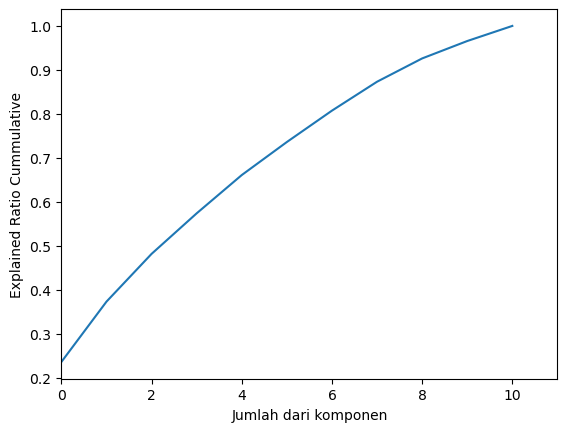

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,11,1)
plt.xlabel('Jumlah dari komponen')
plt.ylabel('Explained Ratio Cummulative')

In [7]:
model_pca = PCA(n_components=2)
y_pca = model_pca.fit_transform(x_std)
print(y_pca)

[[ 1.29920239e+00  1.51963226e+00]
 [ 3.10471967e+00  6.07951471e-01]
 [ 2.54663211e+00 -8.97456895e-01]
 [ 4.14233141e-02 -1.42186533e+00]
 [-1.84838323e+00  4.06141281e-01]
 [-1.96827040e+00 -2.29789257e-01]
 [ 2.22890524e+00  1.04433018e+00]
 [-1.29574911e-01  6.05074938e-01]
 [ 9.66321137e-01  1.49169204e-01]
 [ 2.78909803e+00 -5.85800060e-01]
 [-4.58520272e-02 -8.44978449e-01]
 [ 9.53867325e-03  1.81642825e+00]
 [ 1.19945197e+00  2.93087725e-01]
 [-2.54014007e+00 -4.68762084e-01]
 [-8.92118292e-01  1.00607848e+00]
 [-1.04857473e+00 -3.31639036e-01]
 [-7.32273140e-01 -1.31968126e+00]
 [-6.67623148e-01 -3.81660422e-01]
 [-1.31109538e+00  4.57142420e-01]
 [-1.97980126e+00 -3.08096966e-02]
 [ 7.32490993e-01 -5.78607905e-01]
 [-9.24281729e-01  3.24329793e+00]
 [ 6.83493653e-04  4.55308079e-01]
 [-8.73236044e-02  1.39626466e-01]
 [ 2.22421094e+00 -1.10519074e+00]
 [-6.26038172e-01 -3.90092685e-01]
 [-1.64548865e+00  1.40071080e+00]
 [ 1.57031518e+00  1.09407582e+00]
 [-1.03086609e+00 -4

In [8]:
x_pca = pd.DataFrame(data = y_pca)
x_pca.columns = ['pca_1', 'pca_2']
x_pca

,pca_1,pca_2
0,1.299202,1.519632
1,3.104720,0.607951
2,2.546632,-0.897457
3,0.041423,-1.421865
4,-1.848383,0.406141
...,...,...
298,-0.990958,-0.950580
299,1.870268,0.137899
300,1.455552,-2.430978
301,-1.094583,1.320035


## Pemodelan
untuk pemodelan menggunakan K-Means, karena data yang kami gunakan kebanyakan numerik dan kmeans menghasilkan hasil yang lebih baik dengan visualisasi bulat yang mana bisa mempermudah interpretasi .menggunakan n_cluster = 2 yang nantikan akan ada 2 klaster. Kami menggunakan iterasi = 5000

In [9]:
kmeans = KMeans(n_clusters = 2,
               init = 'k-means++',
               n_init = 'auto',
               max_iter = 5000,
               tol = 0.0001)
kmeans.fit(x_pca)

KMeans(max_iter=5000, n_clusters=2, n_init='auto')

Output Posisi centroid pada masing-masing klaster

In [10]:
kmeans.cluster_centers_

array([[ 1.61652089, -0.15695488],
       [-1.16646678,  0.11325721]])

inersia dari model dengan 2 klaster. Ketika output inersia Semakin rendah inersia, semakin baik klaster yang dihasilkan.

In [11]:
kmeans.inertia_

666.7384204796533

menghitung perbedaan inertia (delta inertia) antara berbagai jumlah cluster (K) dari 1 hingga 15 dan menyimpannya dalam daftar `result`. Perbedaan inertia adalah pengurangan inertia saat jumlah cluster bertambah satu. Sehingga daftar `result` yang berisi perbedaan inertia antara jumlah cluster berturut-turut. Hasilnya memberikan wawasan tentang jumlah cluster yang optimal.

In [12]:
cs = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_pca)
    cs.append(kmeans.inertia_)

grafik inersia dengan banyaknya klaster untuk melihat jumlah inersia pada tiap klaster

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

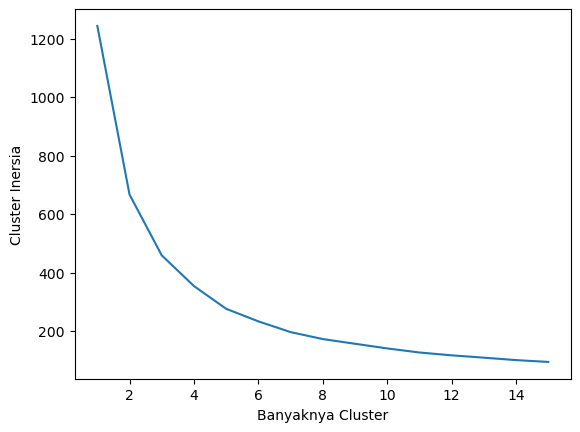

In [13]:
plt.plot(range(1,16),cs)
plt.xlabel('Banyaknya Cluster')
plt.ylabel('Cluster Inersia')
plt.plot

In [14]:
result = []
for i in range(1,len(cs)):
    del_cs = cs[i]-cs[i-1]
    result.append(del_cs)
result

[-576.7284418167287,
 -207.91479069100865,
 -104.9348760895731,
 -77.8054039768873,
 -42.97259220626265,
 -36.70015145340341,
 -23.81771485517521,
 -16.099976615150467,
 -15.91140449318084,
 -13.930026866385745,
 -9.731947571194667,
 -7.968309030168612,
 -8.3135883264991,
 -6.224641103204519]

## Prediksi Klaster
hasil prediksi klaster pada tiap pasien menggunakan KMeans dengan n_clusters=2

In [15]:
kmeans = KMeans(n_clusters=2).fit(x_pca)
z = kmeans.predict(x_pca)
z

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

## Visualisasi hasil klaster
memvisualisasikan hasil klastering dengan K-Means pada data yang direduksi dimensinya menggunakan dua komponen utama (PC1 dan PC2) dari PCA

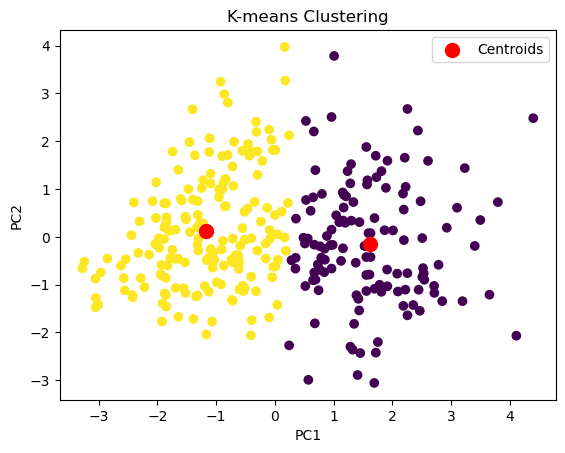

In [16]:
import matplotlib.pyplot as plt

# Visualisasi data hasil klaster
plt.scatter(x_pca['pca_1'], x_pca['pca_2'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [17]:
a = []
for i in z:
    if i == 0:
        a.append(0)
    else:
        a.append(1)
df['predict'] = a

df["predict"] = df["predict"].astype("int")
df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,predict
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,0
2,3,67,1,4,120,229,0,2,129,1,2.6,2,0
3,4,37,1,3,130,250,0,0,187,0,3.5,3,1
4,5,41,0,2,130,204,0,2,172,0,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,0
300,301,57,1,4,130,131,0,0,115,1,1.2,2,0
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1


## Analisis dan Eksplorasi Data

### Perbandingan minimal usia yang diprediksi klaster 0 dan klaster 1

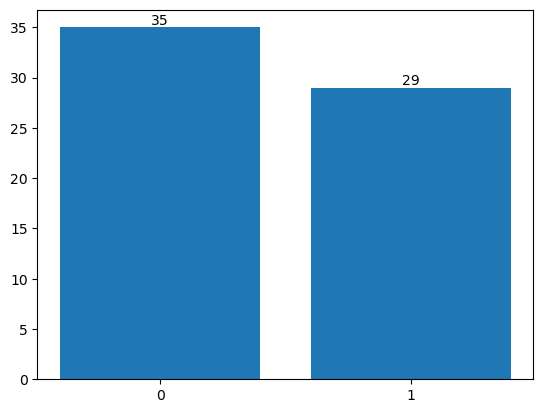

In [18]:
ages = pd.pivot_table(df, index='predict', values='age', aggfunc='min')
label = ['0','1']
plt.bar(label, ages['age'])
for i in range(len(ages)):
    plt.annotate(str(ages['age'][i]), xy=(ages.index[i], ages['age'][i]), horizontalalignment='center', verticalalignment='bottom')

plt.show()

### Perbandingan nilai max thalach dari pasien yang diprediksi klaster 0 dan klaster 1


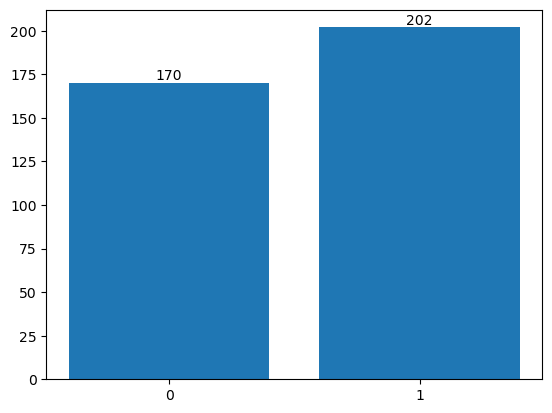

In [19]:
thalach = pd.pivot_table(df, index='predict', values='thalach', aggfunc='max')
plt.bar(label, thalach['thalach'])
for i in range(len(thalach)):
    plt.annotate(str(thalach['thalach'][i]), xy=(ages.index[i], thalach['thalach'][i]), horizontalalignment='center', verticalalignment='bottom')

plt.show()

### perbandingan gender berdasarkan klaster

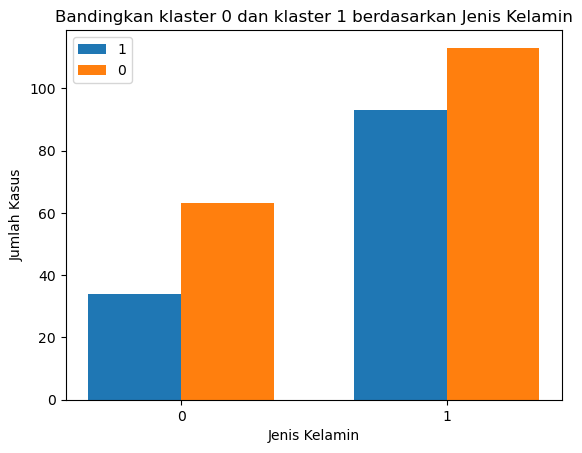

In [20]:
sex = pd.pivot_table(df, index='sex', columns= 'predict', values='age', aggfunc='count')

# Data
bergejala = np.array([34, 93])
tidak_bergejala = np.array([63, 113])
jenis_kelamin = ['0', '1']

# Mengatur lebar bar
bar_width = 0.35

# Mengatur posisi bar
index = np.arange(len(jenis_kelamin))

# Membuat bar chart
plt.bar(index, bergejala, bar_width, label='1')
plt.bar(index + bar_width, tidak_bergejala, bar_width, label='0')

# Menambahkan label dan judul
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Kasus')
plt.title('Bandingkan klaster 0 dan klaster 1 berdasarkan Jenis Kelamin')
plt.xticks(index + bar_width / 2, jenis_kelamin)
plt.legend()

# Menampilkan grafik
plt.show()
